In [1]:
%matplotlib inline

import pandas as pd

In [2]:
titles = pd.read_csv('titles.csv', index_col=None)

titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


# 1. Using groupby(), plot the number of films that have been released each decade in the history of cinema.

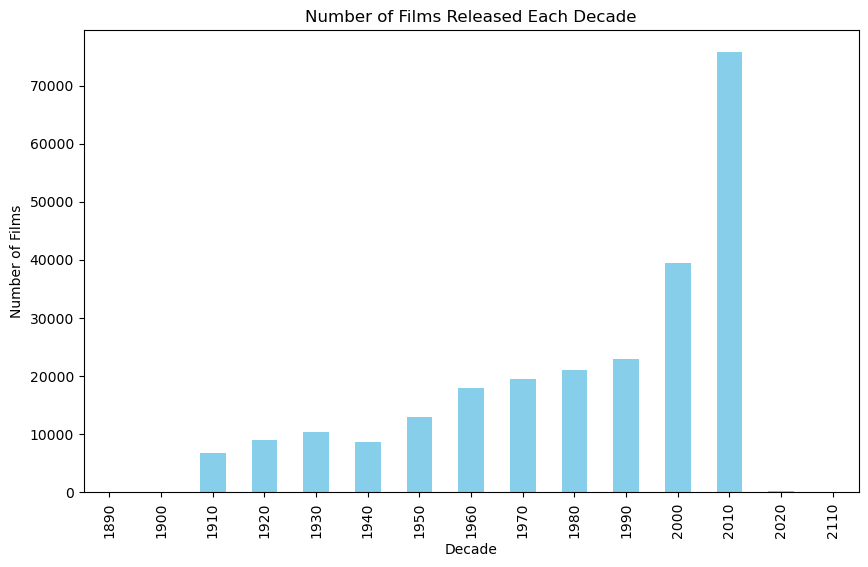

In [4]:
# Assuming 'release_year' is the column name containing release years in the 'titles' DataFrame
# If it's named differently, please replace it with the correct column name
titles['decade'] = (titles['year'] // 10) * 10

# Group by decade and count the number of films
films_per_decade = titles.groupby('decade').size()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.show()

# 2. Use groupby() to plot the number of "Hamlet" films made each decade.

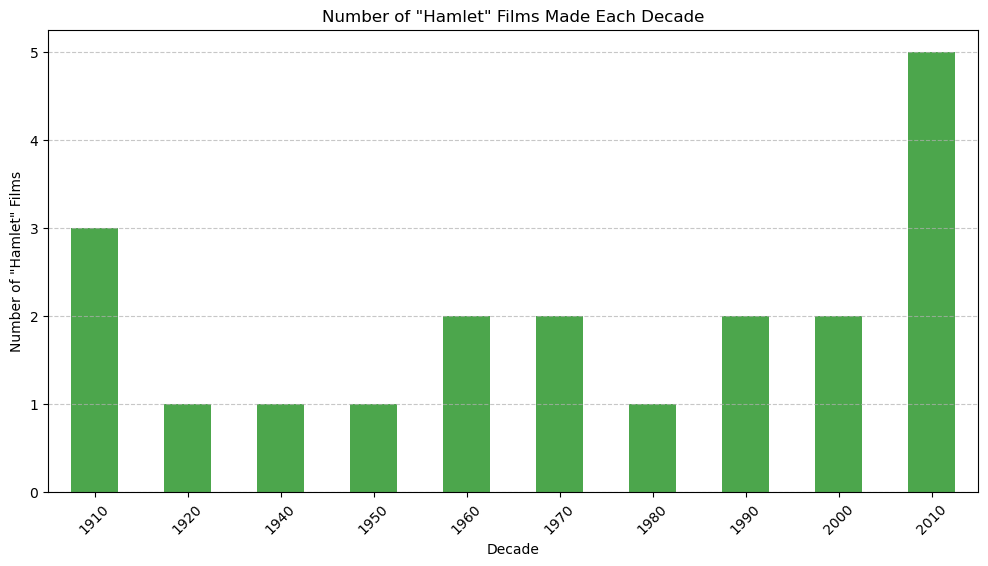

In [6]:
hamlet_films = titles[titles['title'] == 'Hamlet'].copy()  # Create a copy to avoid the warning

# Create a new column for the decade using .loc
hamlet_films.loc[:, 'decade'] = (hamlet_films['year'] // 10) * 10

# Group the DataFrame by the 'decade' column and count the number of "Hamlet" films in each decade
hamlet_films_per_decade = hamlet_films.groupby('decade')['title'].count()

# Create a bar plot to visualize the number of "Hamlet" films per decade
plt.figure(figsize=(12, 6))
hamlet_films_per_decade.plot(kind='bar', color='green', alpha=0.7)
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
cast = pd.read_csv('cast.csv', index_col=None)

cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 3. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [8]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Create two DataFrames: one for actors and one for actresses
leading_roles_actors = roles_1950s[(roles_1950s['n'] == 1) & (roles_1950s['type'] == 'actor')]
leading_roles_actresses = roles_1950s[(roles_1950s['n'] == 1) & (roles_1950s['type'] == 'actress')]

# Group each DataFrame by 'year' and count the number of leading roles for actors and actresses
leading_roles_actors_count = leading_roles_actors.groupby('year')['n'].count()
leading_roles_actresses_count = leading_roles_actresses.groupby('year')['n'].count()

# Create a DataFrame to store the results
leading_roles_count_df = pd.DataFrame({
    'Year': leading_roles_actors_count.index,
    'Leading Roles (Actors)': leading_roles_actors_count.values,
    'Leading Roles (Actresses)': leading_roles_actresses_count.values
})

# Display the result
print(leading_roles_count_df)

   Year  Leading Roles (Actors)  Leading Roles (Actresses)
0  1950                     625                        288
1  1951                     651                        285
2  1952                     613                        304
3  1953                     664                        312
4  1954                     636                        316
5  1955                     648                        285
6  1956                     668                        307
7  1957                     739                        315
8  1958                     715                        301
9  1959                     733                        327


# 4. In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [10]:
# Step 1: Filter roles from the 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Step 2: Filter for roles with n values between 1 and 5
filtered_roles = roles_1950s[(roles_1950s['n'] >= 1) & (roles_1950s['n'] <= 5)]

# Step 3: Group by gender and n value
roles_by_gender_n = filtered_roles.groupby(['type', 'n'])

# Step 4: Count the number of roles for each combination of gender and n value
roles_count = roles_by_gender_n.size()

# Display the result
print(roles_count)

type     n  
actor    1.0    6692
         2.0    4640
         3.0    5654
         4.0    5663
         5.0    5674
actress  1.0    3040
         2.0    4635
         3.0    3201
         4.0    2881
         5.0    2592
dtype: int64


# 5. Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [11]:
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False)]

# Group the DataFrame by movie title and count the number of roles for each movie
roles_per_movie = pink_panther_movies.groupby('title')['character'].count()

# Display the result
print(roles_per_movie)

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
Name: character, dtype: int64


# 6. List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [12]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the DataFrame by movie title and count the number of roles played by Frank Oz in each movie
roles_per_movie = frank_oz_roles.groupby(['title', 'year'])['character'].count().reset_index()

# Filter movies where Frank Oz has played more than 1 role
multiple_roles_movies = roles_per_movie[roles_per_movie['character'] > 1]

# Sort the resulting DataFrame by year
multiple_roles_movies_sorted = multiple_roles_movies.sort_values('year')

# Display the result
print(multiple_roles_movies_sorted)

                                   title  year  character
24                      The Muppet Movie  1979          8
0         An American Werewolf in London  1981          2
22                The Great Muppet Caper  1981          6
20                      The Dark Crystal  1982          2
25            The Muppets Take Manhattan  1984          7
2                       Follow That Bird  1985          3
23            The Muppet Christmas Carol  1992          7
7                 Muppet Treasure Island  1996          4
8                     Muppets from Space  1999          4
18  The Adventures of Elmo in Grouchland  1999          3


# 7. List each of the characters that Frank Oz has portrayed at least twice

In [13]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the DataFrame by character name and count the number of times each character has been portrayed
character_counts = frank_oz_roles['character'].value_counts().reset_index()
character_counts.columns = ['Character', 'Portrayal Count']

# Filter characters that have been portrayed at least twice
characters_portrayed_at_least_twice = character_counts[character_counts['Portrayal Count'] >= 2]

# Display the result
print(characters_portrayed_at_least_twice)

        Character  Portrayal Count
0      Miss Piggy                6
1            Yoda                6
2          Animal                6
3  Cookie Monster                5
4   Sam the Eagle                5
5     Fozzie Bear                4
6            Bert                3
7          Grover                2
